# Lab 8 : Star Formation 

In [2]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [3]:
def StarFormationRate(L, Type, TIR=0, ):
    """ Computes the star formation rate of a galaxy following
    Kennicuttt and Evans (2012) Eqn. 12 (ARA&A 50)
    
    Inputs:
        L : `float`
            Luminosity of the galaxy in a given waveband (erg/s)
            
        Type : `string`
            The wavelength: "FUV", "NUV", "TIR", "HAlpha"
        
        TIR : `float`
            Total infrared luminosity in ergs/s (default = 0)
        
    Outputs:
        SFR : `float`
            Log of the star formation rate (Msun/yr)
    
    """
    params = {"FUV":[43.45, 0.46], "NUV":[43.17, 0.27], "HAlpha":[41.27, 0.0024], "TIR":[43.41, 0]}
    
    try:
        logCx, TIRc = params[Type]
    except:
        print(f"Your input does not match the options {[i for i in params]}")
        return
    
    # correct luminosity for dust using TIR
    Lnew = L + TIRc*TIR
    
    SFR = np.log10(Lnew) - logCx
    
    return SFR

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [4]:
#  WLM Dwarf Irregular Galaxy
# (Data from NED) Luminosity : 1.71e7 Lsun, NIR: 2.48e6 Lsun, FIR: 7.84e5 Lsun

LsunErgS = const.L_sun.to(u.erg/u.s).value
NUV_WLM = 1.71e7 * LsunErgS
TIR_WLM = 2.48e6 + 7.84e5 * LsunErgS

print(StarFormationRate(NUV_WLM, 'NUV', TIR_WLM))

-2.348688855167346


In [5]:
#  NGC24 Sc galaxy
# (Data from NED) Luminosity :  2.96E+08 , NIR: 8.34E+08 , FIR : 3.09E+08

NUV_NGC = 2.96e8 * LsunErgS
TIR_NGC = 8.34e8 + 3.09e8 * LsunErgS

print(StarFormationRate(NUV_NGC, 'NUV', TIR_NGC))

-1.0078964050716621


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [6]:
def SFRMainSequence(Mstar, z):
    """ Function that computes the aerage SFR of a galaxy
    as a function of the Stellar Mass.
    
    Inputs:
        MSTAR : `float`
            stellar mass of the galaxy in Msun
        
        z : `float`
            redshift
    
    Outputs: 
        logSFr : `float`
            log(SFR (Msun/yr))
    """
    
    alpha = 0.7 - 0.13 * z
    beta = 0.38 + 1.14 * z - 0.19 * z ** 2
    logSFR = alpha * (np.log10(Mstar) - 10.5) + beta
    
    return logSFR

# Step 2

In [7]:
# MW at z=0
print(10**SFRMainSequence(8e10, 0))

4.5937038237959715


In [8]:
# MW at z = 1
print(10**SFRMainSequence(8e10, 1))

36.287854588142594


# Step 3

In [9]:
# create an array of stellar masses
Mass = np.linspace(1e9, 1e12)

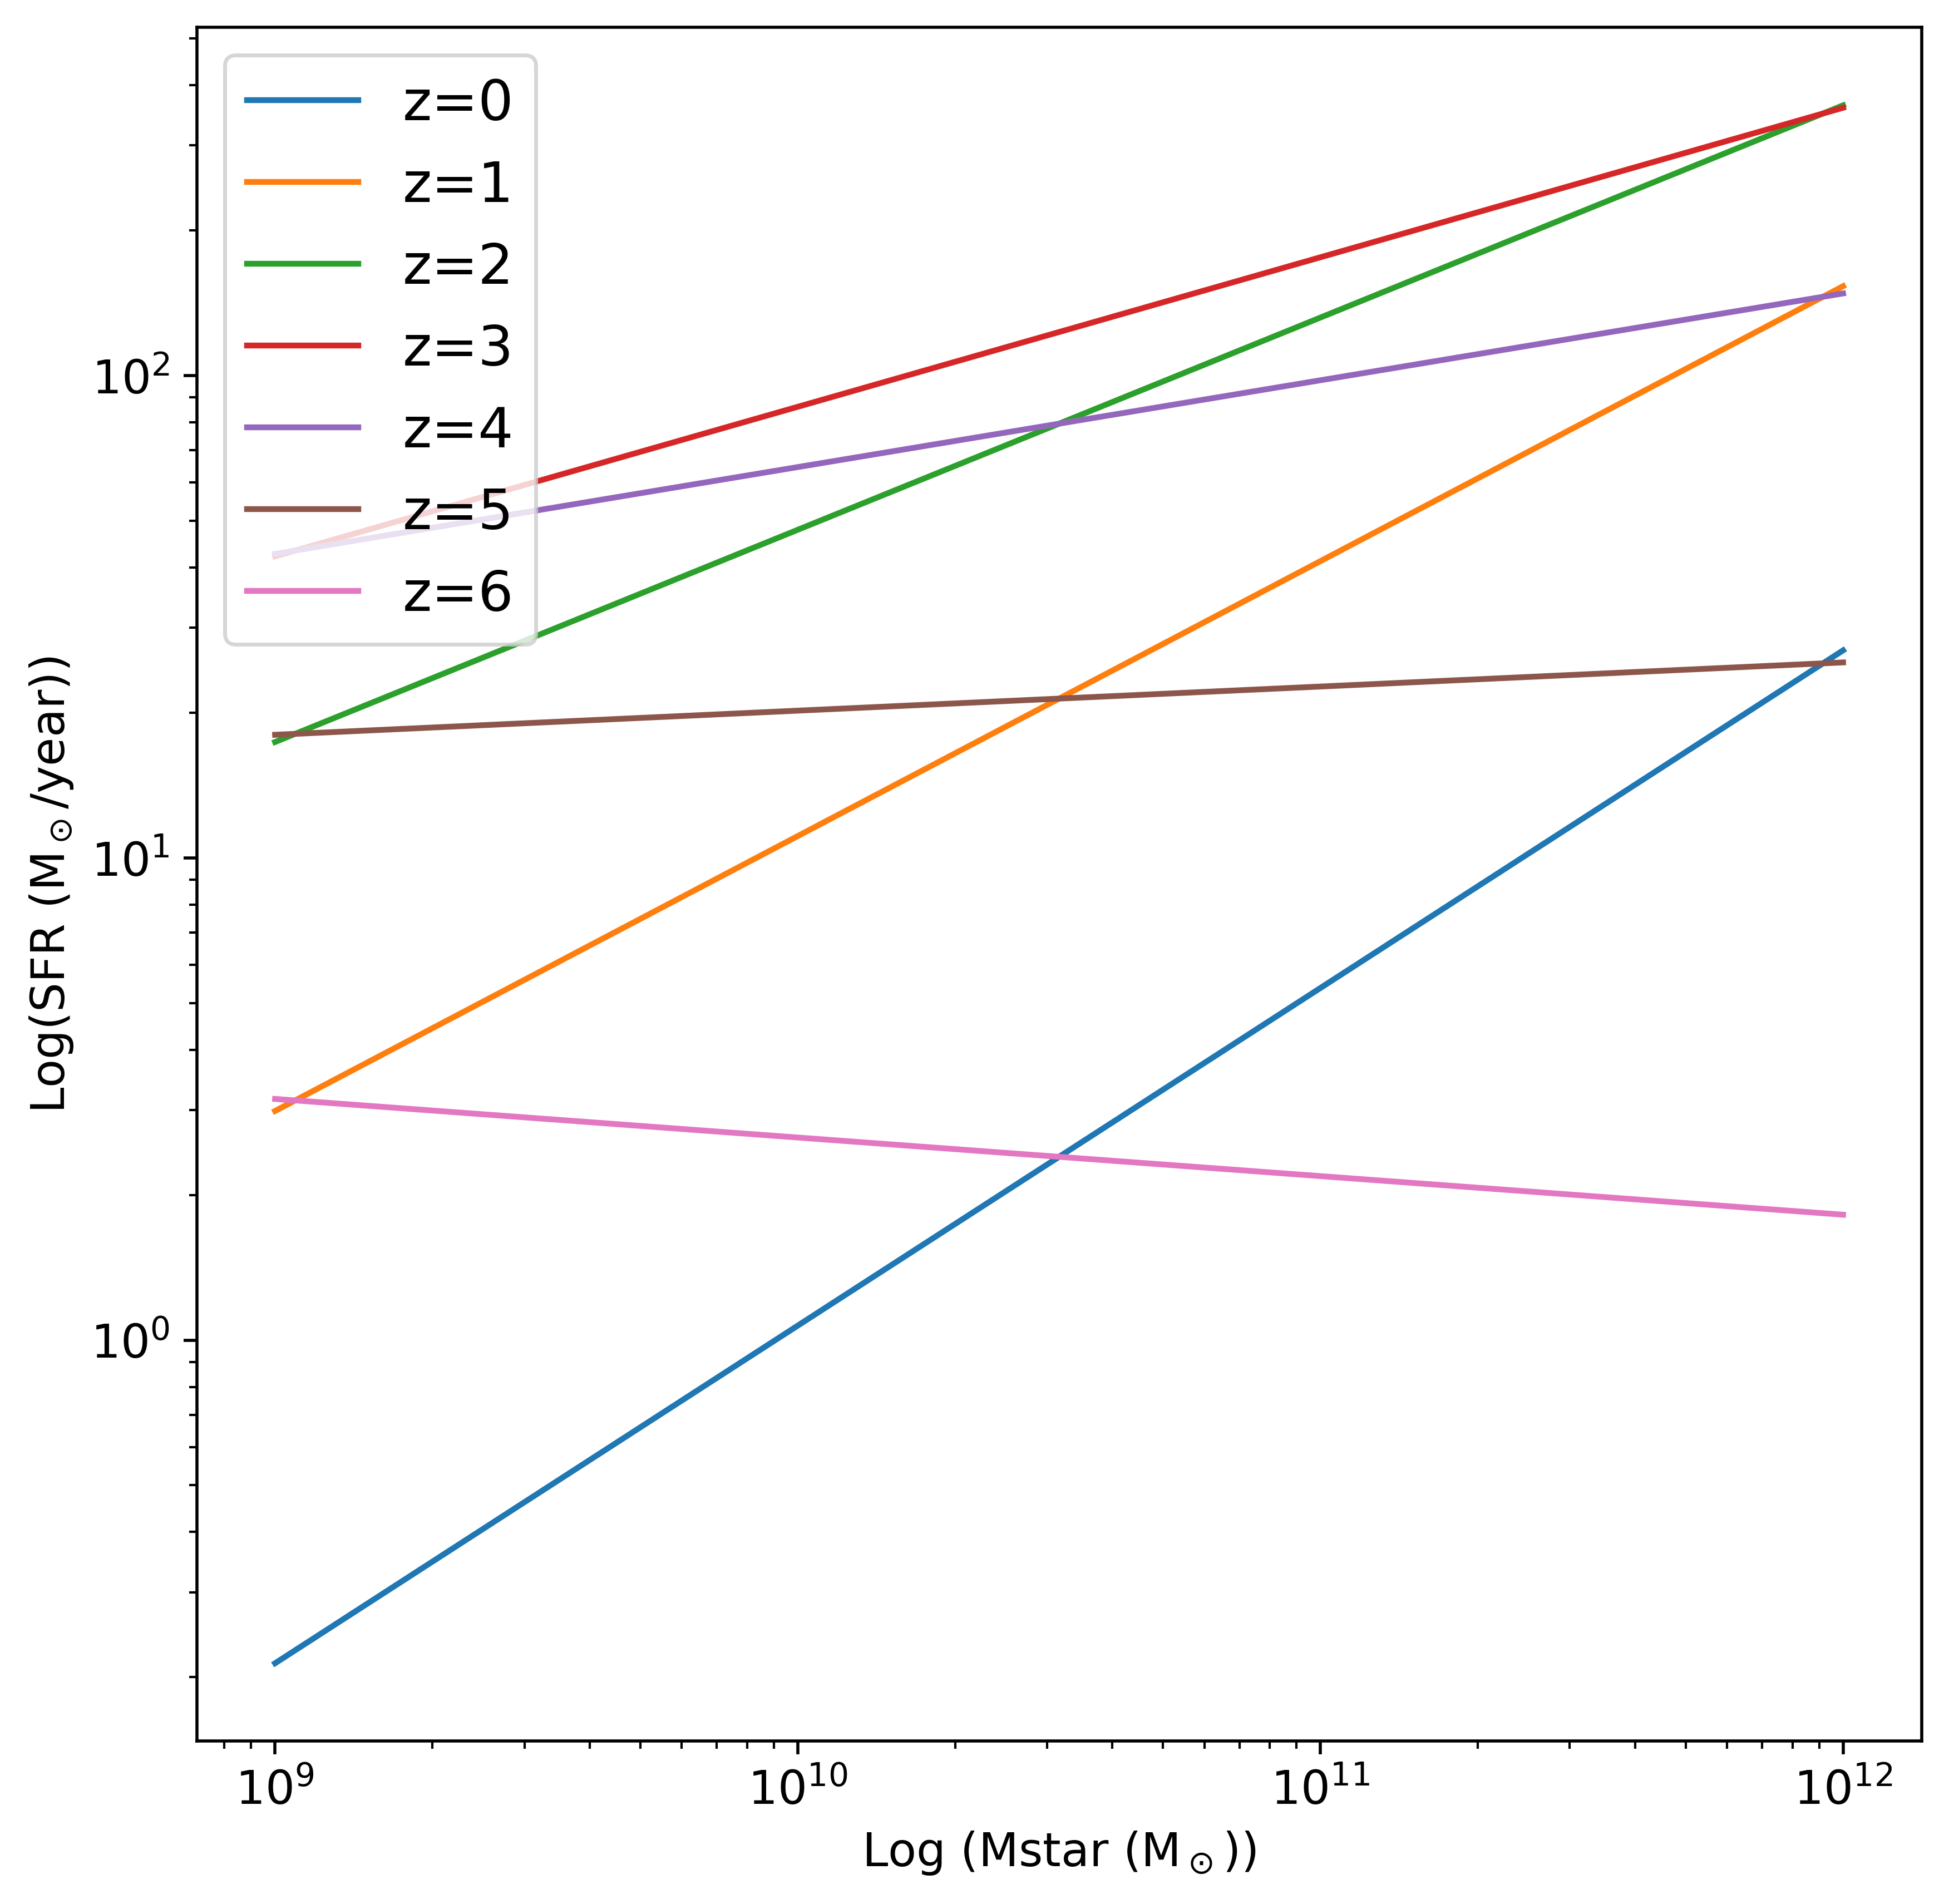

In [18]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
for z in range(0,7):
    plt.loglog(Mass, 10**SFRMainSequence(Mass, z), label=f'z={z}')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [23]:
# normal galaxies 
print(10**StarFormationRate(1e10*LsunErgS, "TIR"))

1.4892648150381245


In [24]:
# LIRGs  
print(10**StarFormationRate(1e11*LsunErgS, "TIR"))

14.892648150381245


In [25]:
# ULIRGs
print(10**StarFormationRate(1e12*LsunErgS, "TIR"))

148.92648150381245


In [26]:
# HLIRGs
print(10**StarFormationRate(1e13*LsunErgS, "TIR"))

1489.2648150381244
